## Latency comparison between different servers

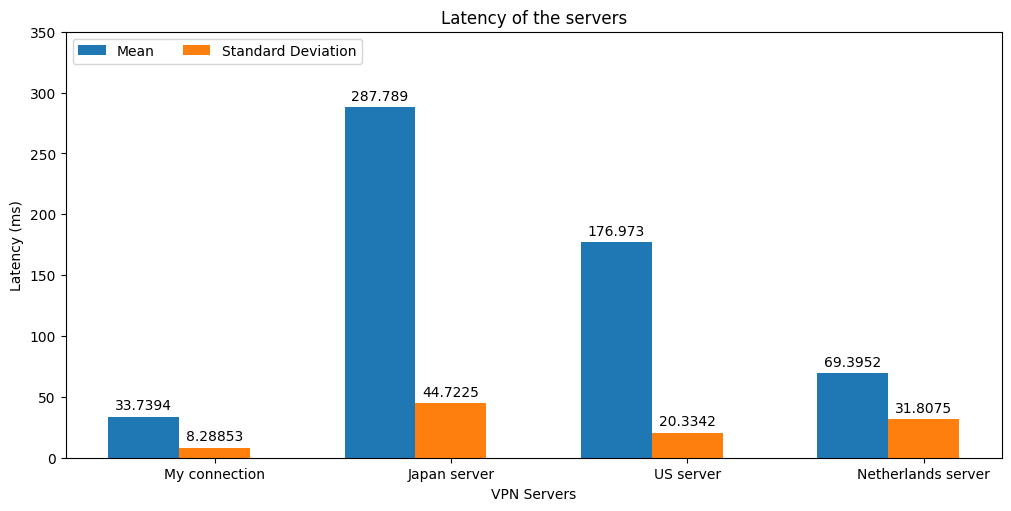

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pingJP = np.loadtxt("./ping/ping_JP.txt")
pingUS = np.loadtxt("./ping/ping_US.txt")
pingNL = np.loadtxt("./ping/ping_NL.txt")
pingMY = np.loadtxt("./ping/ping.txt")

pingData= pd.DataFrame({'My connection':pingMY, 'Japan server':pingJP,'US server':pingUS,'Netherlands server':pingNL})
mean=pingData.mean()
std=pingData.std()
result = pd.DataFrame({'Server location':pingData.columns, 'Mean': mean,
                        'Standard Deviation': std })
result=result.reset_index()

serverLocation=result['Server location']
result = result.drop(['index', 'Server location'], axis=1)

x = np.arange(len(serverLocation))  # the label locations
width = 0.30  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

for attribute, measurement in result.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Latency (ms)')
ax.set_xlabel('VPN Servers')
ax.set_title('Latency of the servers')
ax.set_xticks(x + width, serverLocation)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 350)

plt.show()


## Bandwidth comparison

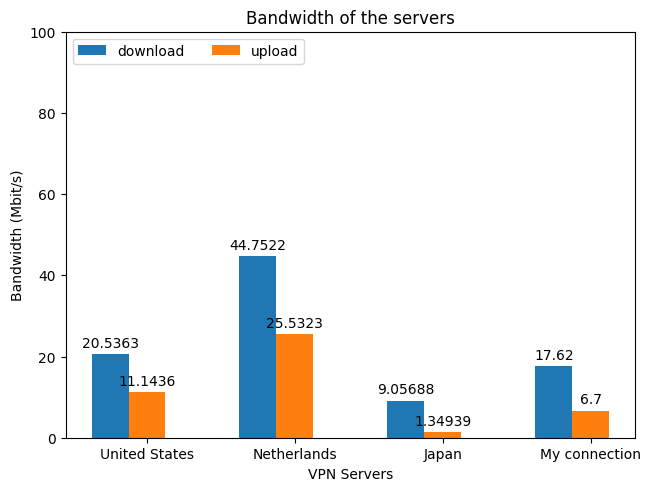

In [17]:
import pandas as pd
speedTests=pd.read_json('speedtest.json')
speedTests=speedTests.drop(['command'], axis=1)
speedTests['upload']=speedTests['upload'].divide(10**6)
speedTests['download']=speedTests['download'].divide(10**6)

serverLocation = speedTests['country']
result = speedTests.drop(['country'], axis=1)

x = np.arange(len(serverLocation))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in result.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Bandwidth (Mbit/s)')
ax.set_xlabel('VPN Servers')
ax.set_title('Bandwidth of the servers')
ax.set_xticks(x + width, serverLocation)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()


Text(0, 0.5, 'Latency (ms)')

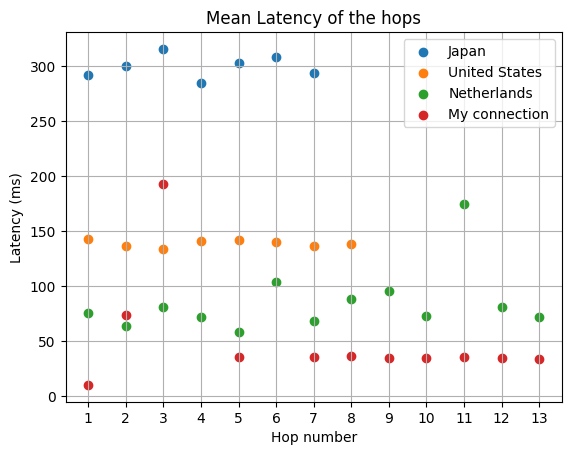

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mtrJP = pd.read_json('mtr/mtr_JP.json')
mtrUS = pd.read_json('mtr/mtr_US.json')
mtrNL = pd.read_json('mtr/mtr_NL.json')
mtr = pd.read_json('mtr/mtr.json')
mtrJP['country']='Japan'
mtrUS['country'] = 'United States'
mtrNL['country']='Netherlands'
mtr['country'] = 'My connection'
result=pd.concat([mtrJP, mtrUS, mtrNL, mtr], ignore_index=True)
result=result.drop(['host','Snt','Last','Loss%','Best','Wrst','StDev'], axis=1)
result.groupby(['country','count']).mean()
result=result.reset_index()
result=result.drop(['index'],axis=1)
result
for country in result['country'].unique():
     tmp = result[result['country'] == country]
     tmp = tmp.drop(['country'], axis=1)
     tmp = tmp.groupby('count').mean()
     tmp=tmp.reset_index()
     tmp=tmp[tmp['Avg']!=0]
     plt.scatter(x=tmp['count'],y=tmp['Avg'], label=country)
     plt.legend()
plt.xlabel('Hop number')
plt.title('Mean Latency of the hops')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.grid(True)
plt.ylabel('Latency (ms)')

Text(0, 0.5, 'Standard deviation')

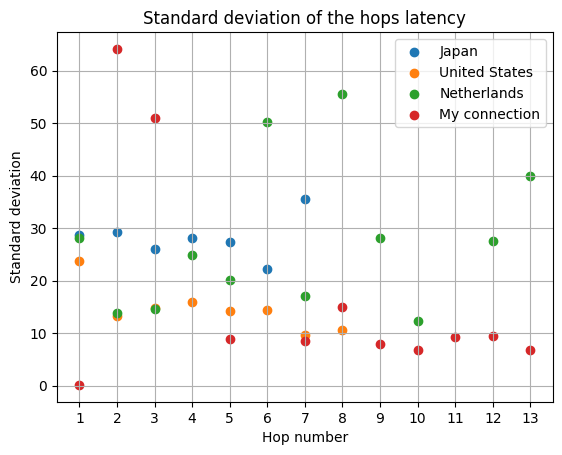

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mtrJP = pd.read_json('mtr/mtr_JP.json')
mtrUS = pd.read_json('mtr/mtr_US.json')
mtrNL = pd.read_json('mtr/mtr_NL.json')
mtr = pd.read_json('mtr/mtr.json')
mtrJP['country'] = 'Japan'
mtrUS['country'] = 'United States'
mtrNL['country'] = 'Netherlands'
mtr['country'] = 'My connection'
result = pd.concat([mtrJP, mtrUS, mtrNL, mtr], ignore_index=True)
result = result.drop(['host', 'Snt', 'Last', 'Loss%',
                     'Best', 'Wrst', 'Avg'], axis=1)
result.groupby(['country', 'count']).mean()
result = result.reset_index()
result = result.drop(['index'], axis=1)
for country in result['country'].unique():
    tmp = result[result['country'] == country]
    tmp = tmp.drop(['country'], axis=1)
    tmp = tmp.groupby('count').mean()
    tmp=tmp.reset_index()
    tmp=tmp[tmp['StDev']!=0]
    plt.scatter(x=tmp['count'],y=tmp['StDev'], label=country)
    plt.legend()
plt.xlabel('Hop number')
plt.title('Standard deviation of the hops latency')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.grid(True)
plt.ylabel('Standard deviation')
